# Support Vector Machine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import helper


## Data

In [2]:

X_train, X_test, y_train, y_test = helper.get_test_train_split()


## Basic model

In [3]:
# Initialize the SVR
model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)

# Train the model
model.fit(X_train, y_train)


SVR(C=100)

## test model

In [4]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 1.648270619562384
R^2 Score: 0.2824935471606661


## Grid search

### 1. C - Regularization Parameter
- Description: The C parameter in an SVM serves as a regularization parameter, affecting the trade-off between achieving a low error on the training data and minimizing the model complexity for better generalization to new data.
- Values: [0.1, 1, 10, 100]
- Effect:
Low values of C: Increase regularization which leads to a smoother decision surface (less complex model). This makes the model less prone to overfitting but might underfit if too low.
High values of C: Decrease regularization which allows the model to better fit the training data, potentially at the risk of overfitting.
### 2. gamma - Kernel Coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
- Description: The gamma parameter defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.
- Values: ['scale', 'auto', 0.01, 0.1, 1]
- Effect:
gamma='scale': Uses 1 / (n_features * X.var()) as the value of gamma. This is the default setting when gamma is 'auto'. The scale option adjusts the gamma values based on the data's variance.
gamma='auto': Uses 1 / n_features as the value of gamma.
Numerical values (0.01, 0.1, 1): Set specific values for gamma, controlling the smoothness of the decision boundary. Smaller values mean a smoother boundary.
### 3. epsilon - Epsilon in the epsilon-SVR model
- Description: This parameter specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.
- Values: [0.01, 0.1, 0.5]
- Effect:
Smaller epsilon: Can result in a model that tries to fit the training set as closely as possible and might capture more noise in the training data.
Larger epsilon: Makes the model smoother, potentially more robust to outliers, as predictions that fall within epsilon from the true value are not penalized.

In [5]:

# Set the parameters by cross-validation
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.5]
}

from sklearn.model_selection import RandomizedSearchCV

# Using RandomizedSearchCV to sample a subset of the parameter space
random_search = RandomizedSearchCV(SVR(), param_distributions=param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(-random_search.best_score_))




/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'gamma': 0.01, 'epsilon': 0.5, 'C': 10}
Best cross-validation score: 2.90


# Understanding the Results
## Best Parameters:
### Gamma (0.01): 
Lower gamma values mean that the decision boundary is smoother, which can be good for generalizing but might under-fit on very complex data.
### Epsilon (0.5): 
This value determines the width of the epsilon-insensitive tube within which no penalty is associated in the training loss function. A higher epsilon can reduce the model's sensitivity to training errors.
### C (10): 
This is the regularization parameter, which balances fitting the training data well (low bias) against keeping the model simple for better generalization (low variance). The chosen value indicates a moderate trade-off.

# Graph of the optimzed model 

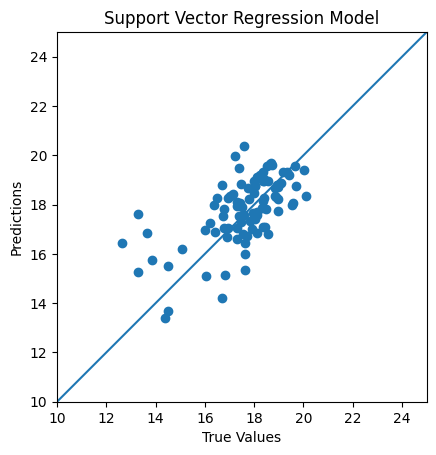

In [6]:
plt.scatter((y_test), (y_pred))
plt.title('Support Vector Regression Model')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,25])
plt.ylim([10,25])
_ = plt.plot([-100, 100], [-100, 100])

In [7]:
ratio = helper.revenue_exp(y_test) /helper.revenue_exp( y_pred)
print(ratio.describe())


mse = mean_squared_error(helper.revenue_exp(y_test), helper.revenue_exp( y_pred))
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


count    93.000000
mean      1.550841
std       1.949354
min       0.013065
25%       0.374306
50%       0.908570
75%       1.893023
max      11.751413
Name: revenue, dtype: float64
Mean Squared Error: 1.6755839960465474e+16
Root Mean Squared Error: 129444350.8248447
